In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,author,publicationTime,bodyText
0,0,2.209799e+09,10/02/2016 10:30,RT @350Australia: Adani Group's Aust #coal min...
1,1,2.209799e+09,10/02/2016 10:36,RT @avivaimhof: Poor old #coal. Now even #Viet...
2,2,4.306011e+07,10/02/2016 10:37,RT @market_forces: Funds have burned billions ...
3,3,2.209799e+09,10/02/2016 10:37,RT @avivaimhof: #Vietnam PM Announces Retreat ...
4,4,5.855606e+08,10/02/2016 10:41,RT @350Australia: Adani Group's Aust #coal min...


In [57]:
interval = input('Enter Interval in seconds : ')

Enter Interval in seconds : 3600


In [58]:
df["publicationTime"] = pd.to_datetime(df["publicationTime"],  format='%d/%m/%Y %H:%M')
df['bodyText'].fillna('not found',inplace=True)


In [59]:
import time
import datetime
users = []
combine_data = []
counter  = 0
tweet_time = 0
old_timestamp = 0
row_count = 0
df_user = pd.DataFrame()
df_retweet = pd.DataFrame()
df_count = pd.DataFrame()
index_counter = 0
def filter_data(text, combine_data):
    for t in text.split(' '):
        if t.startswith('@'):
            combine_data.append(t)
    return combine_data

def filter_retweet(text, count):
    for index, t in enumerate(text.split(' ')):
        if index == 0 and t == 'RT':
            count += 1
    return count  
for i, row in df.iterrows():
    type = pd.isnull(row['publicationTime'])
    if not type:
        timestamp = time.mktime(row['publicationTime'].timetuple())
        if i == 0:
            old_timestamp = timestamp
        if tweet_time > old_timestamp + float(interval):
            diff = (tweet_time - old_timestamp + float(interval))/float(interval)
            for d in range(1,int(diff)):
                index_counter += 1
                pub = datetime.datetime.fromtimestamp(int(old_timestamp+(float(interval*d)))).strftime('%Y-%m-%d %H:%M:%S')
                print("datetime> ",pub)
                temp1 = pd.DataFrame({'publicationTime': pub, 'users': len(set(combine_data))},index=[index_counter])
                temp2 = pd.DataFrame({'publicationTime': pub, 'retweet': counter},index=[index_counter])
                temp3 = pd.DataFrame({'publicationTime': pub, 'count': row_count},index=[index_counter])
                df_user = pd.concat([df_user, temp1])
                df_retweet = pd.concat([df_retweet, temp2])
                df_count = pd.concat([df_count, temp3])
                old_timestamp = old_timestamp+(float(interval*d))           
            combine_data = []
            counter = 0
            row_count = 0
        else:
            combine_data = filter_data(row['bodyText'], combine_data)
            counter = filter_retweet(row['bodyText'], counter)
            tweet_time = timestamp
            row_count += 1
print(df_count.head(10))
print(df_user.head(10))  
print(df_retweet.head(10))

datetime>  2016-02-10 11:30:00
datetime>  2016-02-10 12:30:00
datetime>  2016-02-10 13:30:00
datetime>  2016-02-10 14:30:00
datetime>  2016-02-10 15:30:00
datetime>  2016-02-10 16:30:00
datetime>  2016-02-10 17:30:00
datetime>  2016-02-10 18:30:00
datetime>  2016-02-10 19:30:00
datetime>  2016-02-10 20:30:00
datetime>  2016-02-10 21:30:00
datetime>  2016-02-10 22:30:00
datetime>  2016-02-10 23:30:00
datetime>  2016-02-11 00:30:00
datetime>  2016-02-11 01:30:00
datetime>  2016-02-11 02:30:00
datetime>  2016-02-11 03:30:00
datetime>  2016-02-11 04:30:00
datetime>  2016-02-11 05:30:00
datetime>  2016-02-11 06:30:00
datetime>  2016-02-11 07:30:00
datetime>  2016-02-11 08:30:00
datetime>  2016-02-11 09:30:00
datetime>  2016-02-11 10:30:00
datetime>  2016-02-11 11:30:00
datetime>  2016-02-11 12:30:00
datetime>  2016-02-11 13:30:00
datetime>  2016-02-11 14:30:00
datetime>  2016-02-11 15:30:00
datetime>  2016-02-11 16:30:00
datetime>  2016-02-11 17:30:00
datetime>  2016-02-11 18:30:00
datetime

OSError: [Errno 22] Invalid argument

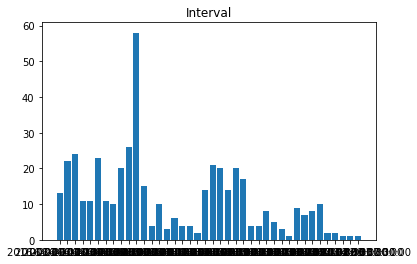

In [60]:
%matplotlib inline
plt.bar(df_count['publicationTime'], df_count['count'], align='center')
plt.title('Interval')
plt.show()

In [ ]:
def gen_window(df):
    window = []
    count = 1
    for i, row in df.iterrows():
        window.append("Window {}".format(count))
        count += 1
    return window

In [ ]:
df_count['window'] = gen_window(df_count)
df_user['windows'] = gen_window(df_user)
df_retweet['windows'] = gen_window(df_retweet)
df_count.to_csv('count_with_interval.csv')
df_user.to_csv('count_with_users.csv')
df_retweet.to_csv('count_with_retweets.csv')